Data sources

https://www.mtbs.gov/project-overview
https://www.mtbs.gov/articles/announcement/data-release-may-1-2017
https://www.mtbs.gov/viewer/index.html
https://www.mtbs.gov/direct-download
https://www.geomac.gov/
http://www.ospo.noaa.gov/Products/land/hms.html
https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/active-fire-data
https://tinyletter.com/data-is-plural/letters/data-is-plural-2016-07-20-edition

Are we seeing more wildfires:
    Wildfire season
    Acreage burned 
    Frequency of fires

Time period
    Annually
    Five-years


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path = "../data/"
per = pd.read_csv(data_path+'perimeters.csv')
per.head()

,Fire_ID,Fire_Name,Year,ig_date,Acres,FireType,orig_ogc_fid
0,AK5674215793820060522,MESHIK RIVER,2006,2006-05-22,1520,Wildfire,0
1,AK5759815753720050529,PILOT POINT,2005,2005-05-29,4482,Wildfire,1
2,AK5761615232120150828,TWIN CREEKS,2015,2015-08-28,3419,Wildfire,2
3,AK5884115754320150622,COPENHAGEN CREEK,2015,2015-06-22,5335,Wildfire,3
4,AK5884415640120150621,PAULS CREEK,2015,2015-06-21,9684,Wildfire,4


In [4]:
per.dtypes

Fire_ID         object
Fire_Name       object
Year             int64
ig_date         object
Acres            int64
FireType        object
orig_ogc_fid     int64
dtype: object

In [5]:
# Filtering data
acres_gt1000 = per["Acres"] > 999
wildfire_type =  per['FireType'].astype(np.str) == 'Wildfire'
year = per['Year'] > 1984
per = per[wildfire_type & acres_gt1000 & year ]

per.head()
min(per['Year'])



1985

Year
1985    352
1986    241
1987    349
1988    332
1989    244
1990    182
1991    228
1992    186
1993    165
1994    448
1995    228
1996    446
1997    116
1998    253
1999    454
2000    595
2001    357
2002    371
2003    328
2004    239
2005    543
2006    688
2007    459
2008    394
2009    348
2010    271
2011    772
2012    528
2013    288
2014    246
2015    509
Name: Year, dtype: int64


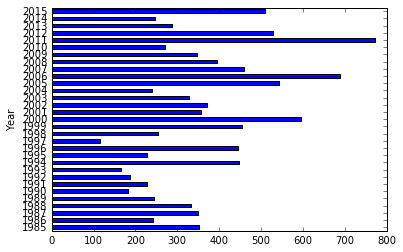

In [6]:
# Frequency of fires
by_year = per.groupby(per["Year"])["Year"].count()
print(by_year)
by_year.plot.barh()

In [7]:
lw = per['Year'] >= 1986
hg = per['Year'] <= 1990
ninety = per[lw & hg]
print(min(ninety['Year']))
max(ninety['Year'])

1986


1990

In [8]:
lw = per['Year'] >= 1991
hg = per['Year'] <= 1995
ninety5 = per[lw & hg]
print(min(ninety5['Year']))
max(ninety5['Year'])

1991


1995

In [9]:
lw = per['Year'] >= 1996
hg = per['Year'] <= 2000
two000 = per[lw & hg]
print(min(two000['Year']))
max(two000['Year'])

1996


2000

In [10]:
lw = per['Year'] >= 2001
hg = per['Year'] <= 2005
two005 = per[lw & hg]
print(min(two005['Year']))
max(two005['Year'])

2001


2005

In [11]:
lw = per['Year'] >= 2006
hg = per['Year'] <= 2010
two010 = per[lw & hg]
print(min(two010['Year']))
max(two010['Year'])

2006


2010

In [12]:
lw = per['Year'] >= 2011
hg = per['Year'] <= 2015
two015 = per[lw & hg]
print(min(two015['Year']))
max(two015['Year'])

2011


2015

1996 - 2005 : 3702
1991 - 1995 : 1255
1996 - 2000 : 1864
2001 - 2005 : 1838
2006 - 2010 : 2160
2011 - 2015 : 2343


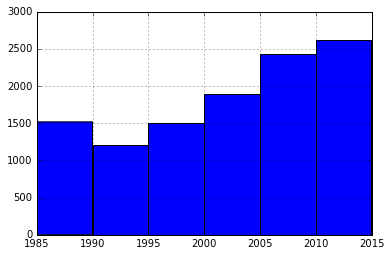

In [19]:
# frequency per 5 year period
print(min(ninety['Year']), '-', max(ninety['Year']), ':', ninety["Year"].count())
print(min(ninety5['Year']), '-', max(ninety5['Year']), ':', ninety5["Year"].count())
print(min(two000['Year']), '-', max(two000['Year']), ':', two000["Year"].count())
print(min(two005['Year']), '-', max(two005['Year']), ':', two005["Year"].count())
print(min(two010['Year']), '-', max(two010['Year']), ':', two010["Year"].count())
print(min(two015['Year']), '-', max(two015['Year']), ':', two015["Year"].count())
per['Year'].hist(bins=6)

In [24]:
lw = per['Year'] >= 1986
hg = per['Year'] <= 1995
eighty = per[lw & hg]
print( eighty["Year"].count())

2603


In [23]:
lw = per['Year'] >= 1996
hg = per['Year'] <= 2005
ninety = per[lw & hg]

print( ninety["Year"].count())

3702


In [22]:
lw = per['Year'] >= 2006
hg = per['Year'] <= 2015
two = per[lw & hg]

print( two["Year"].count())

4503


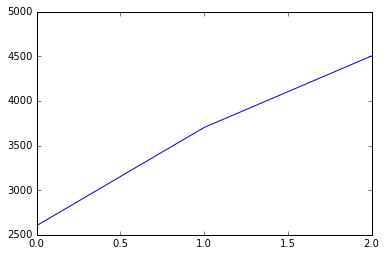

In [30]:
x = [2603, 3702, 4503]
plt.plot(x)

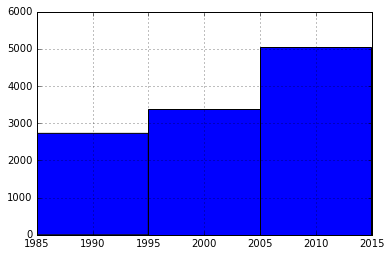

In [21]:
per['Year'].hist(bins=3)

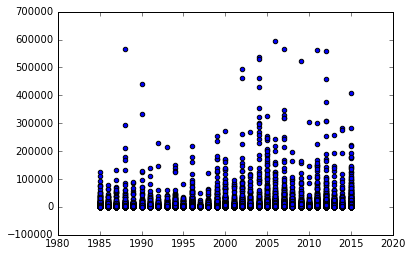

In [181]:
# by_acres = per.groupby(per["Year"])["Acres"].sum()
# print(acres)
# acres.plot.barh()
year_list = per['Year'].values.tolist()
# acre_list = per['Acres'].values.tolist()
acre_list = per['Acres'].values.tolist()

plt.scatter(year_list, acre_list)

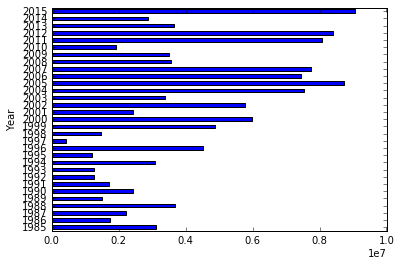

In [211]:
by_acres = per.groupby(per["Year"])["Acres"].sum()
by_acres
by_acres.plot.barh()
# by_acres.hist(bins=5)
# per['Acres'].hist(bins=25)

1986 - 1990 : 11603829
1991 - 1995 : 8509135
1996 - 2000 : 17307722
2001 - 2005 : 27870169
2006 - 2010 : 24163697
2011 - 2015 : 32068736


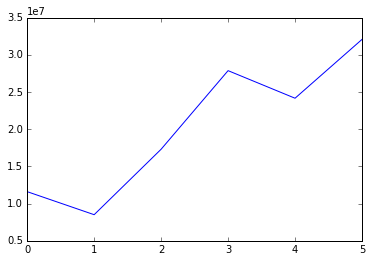

In [194]:
print(min(ninety['Year']), '-', max(ninety['Year']), ':', ninety["Acres"].sum())
print(min(ninety5['Year']), '-', max(ninety5['Year']), ':', ninety5["Acres"].sum())
print(min(two000['Year']), '-', max(two000['Year']), ':', two000["Acres"].sum())
print(min(two005['Year']), '-', max(two005['Year']), ':', two005["Acres"].sum())
print(min(two010['Year']), '-', max(two010['Year']), ':', two010["Acres"].sum())
print(min(two015['Year']), '-', max(two015['Year']), ':', two015["Acres"].sum())

x = [11603829,8509135,17307722,27870169,24163697,32068736]
plt.plot(x)


In [199]:
print(min(ninety['ig_date']), max(ninety['ig_date']) )
print(min(ninety5['ig_date']), max(ninety5['ig_date']) )
print(min(two000['ig_date']), max(two000['ig_date']) )
print(min(two005['ig_date']), max(two005['ig_date']) )
print(min(two010['ig_date']), max(two010['ig_date']) )
print(min(two015['ig_date']), max(two015['ig_date']) )

1986-01-28 1990-11-29
1991-02-05 1995-10-27
1996-01-10 2000-12-27
2001-01-03 2005-12-29
2006-01-01 2010-12-22
2011-01-01 2015-12-26
